## Introduction
##### Climate change has emerged as one of the most pressing challenges of our time, and rising carbon dioxide (CO₂) emissions are widely recognized as a major contributing factor. In this project, we explore the relationship between atmospheric CO₂ concentrations and global temperature anomalies using real-world climate data.

##### Our goal is to:

###### - Analyze long-term trends in CO₂ and temperature,

###### - Understand seasonal patterns and lagged effects,

###### - Perform a “what-if” scenario analysis to simulate the temperature impact of changes in CO₂ levels.

##### To achieve this, we apply time-series decomposition, correlation analysis, and linear regression modeling techniques. These methods help us reveal how CO₂ concentrations influence global temperature changes over time and provide actionable insights for climate policy and awareness.

##### This project not only demonstrates strong data science techniques like resampling, seasonal decomposition, regression, and visualization, but also highlights how data-driven approaches can inform our understanding of real-world environmental issues.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

### Load the datasets

In [42]:
co2_df = pd.read_csv("carbon_emmission.csv")
temp_df = pd.read_csv("temperature.csv")

## Initial data exploration

In [43]:
co2_info = {
    "shape": co2_df.shape,
    "columns": co2_df.columns.tolist(),
    "summary": co2_df.describe(include='all')
}
temp_info = {
    "shape": temp_df.shape,
    "columns": temp_df.columns.tolist(),
    "summary": temp_df.describe(include='all')
}

In [44]:
co2_info

{'shape': (1570, 4),
 'columns': ['ObjectId', 'Country', 'Date', 'Value'],
 'summary':            ObjectId Country     Date        Value
 count   1570.000000    1570     1570  1570.000000
 unique          NaN       1      791          NaN
 top             NaN   World  1991M02          NaN
 freq            NaN    1570        2          NaN
 mean     785.500000     NaN      NaN   180.716153
 std      453.364276     NaN      NaN   180.554706
 min        1.000000     NaN      NaN    -0.100000
 25%      393.250000     NaN      NaN     0.450000
 50%      785.500000     NaN      NaN   313.835000
 75%     1177.750000     NaN      NaN   355.072500
 max     1570.000000     NaN      NaN   424.000000}

##### The shape : (1570, 4) tells there are 1570 rows and 4 columns, there is only one country (World). Date is shows the year and month and 'Value' field  shows the value of carbon emission in that month. The Value of carbon emmission ranges from =0.1 to 424.0

In [45]:
temp_info

{'shape': (225, 66),
 'columns': ['ObjectId',
  'Country',
  'ISO2',
  'ISO3',
  'F1961',
  'F1962',
  'F1963',
  'F1964',
  'F1965',
  'F1966',
  'F1967',
  'F1968',
  'F1969',
  'F1970',
  'F1971',
  'F1972',
  'F1973',
  'F1974',
  'F1975',
  'F1976',
  'F1977',
  'F1978',
  'F1979',
  'F1980',
  'F1981',
  'F1982',
  'F1983',
  'F1984',
  'F1985',
  'F1986',
  'F1987',
  'F1988',
  'F1989',
  'F1990',
  'F1991',
  'F1992',
  'F1993',
  'F1994',
  'F1995',
  'F1996',
  'F1997',
  'F1998',
  'F1999',
  'F2000',
  'F2001',
  'F2002',
  'F2003',
  'F2004',
  'F2005',
  'F2006',
  'F2007',
  'F2008',
  'F2009',
  'F2010',
  'F2011',
  'F2012',
  'F2013',
  'F2014',
  'F2015',
  'F2016',
  'F2017',
  'F2018',
  'F2019',
  'F2020',
  'F2021',
  'F2022'],
 'summary':           ObjectId                       Country ISO2 ISO3       F1961  \
 count   225.000000                           225  223  225  188.000000   
 unique         NaN                           225  223  225         NaN   
 t

##### The shape: (225, 66) tells us there are 225 rows and 66 columns. Each row represents a country, and each column from 1961 to 2022 shows the temperature anomaly for that specific year. The data indicates that global average temperatures have consistently risen in recent decades, with the years 2020–2022 showing the highest anomaly values (~1.5°C+), aligning with global warming trends.

## Trend Analysis

In [46]:
# data for carbon emission analysis
co2_dataset = co2_df.copy() # creating a copy of dataframe for later use
co2_df['Year'] = co2_df['Date'].str.extract(r'(\d{4})').astype(int) # extracting first 4 chaarcters which indiactes year
co2_yearly = co2_df.groupby('Year')['Value'].sum().reset_index()

In [47]:
#Preparing data temperature data, dropping non-year column and melting data into long format
temp_melted = temp_df.melt(
    id_vars=['Country'],
    value_vars=[col for col in temp_df.columns if col.startswith('F')],
    var_name='Year',
    value_name='Temperature_Anomaly'
)
temp_melted['Year'] = temp_melted['Year'].str.extract(r'(\d{4})').astype(int)

In [48]:
# Calculate global average temperature anomaly per year
global_temp_avg = temp_melted.groupby('Year')['Temperature_Anomaly'].mean().reset_index()

# Merge emissions and temperature data
combined_df = pd.merge(co2_yearly, global_temp_avg, on='Year', how='inner')


#### Plotting these trends

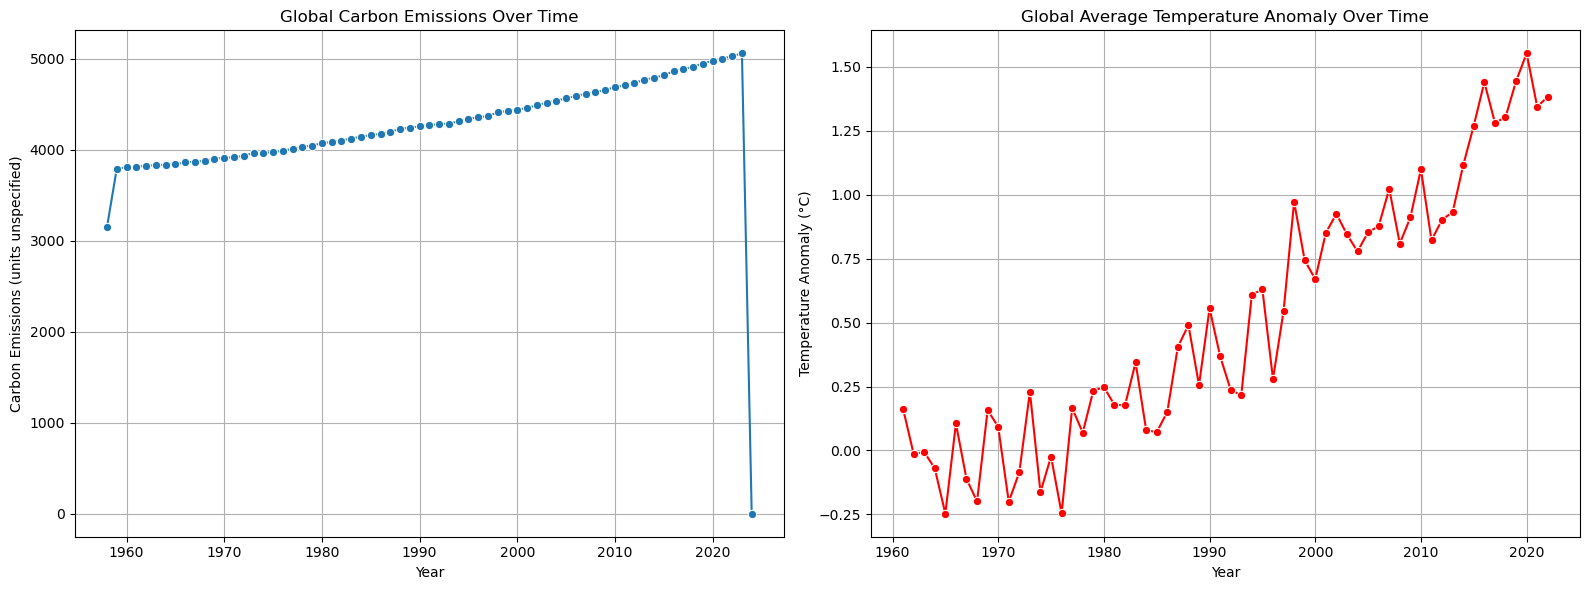

In [49]:
plt.figure(figsize=(16, 6))

# Plot 1: Carbon Emissions over Time
plt.subplot(1, 2, 1)
sns.lineplot(data=co2_yearly, x='Year', y='Value', marker='o')
plt.title('Global Carbon Emissions Over Time')
plt.ylabel('Carbon Emissions (units unspecified)')
plt.grid(True)

# Plot 2: Temperature Anomaly over Time
plt.subplot(1, 2, 2)
sns.lineplot(data=global_temp_avg, x='Year', y='Temperature_Anomaly', color='red', marker='o')
plt.title('Global Average Temperature Anomaly Over Time')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()


##### 1. Global Carbon Emissions Over Time
###### - This plot of CO₂ emissions shows a consistent upward trend starting from the mid-20th century, which corresponds with the industrialization boom.

###### - The values gradually increase, indicating that more fossil fuels are being burned globally, releasing higher amounts of CO₂.

###### - Notable dips can be observed around:

###### - Early 1980s – Oil crises and economic recessions.

###### - 2008–2009 – Global financial crisis.

###### - 2020 – COVID-19 pandemic led to a temporary but sharp drop in emissions.

###### - These dips align with major economic slowdowns, which caused reduced industrial activity, travel, and energy consumption.

##### 2. Temperature Anomalies Over Time
###### - A temperature anomaly is the deviation from a baseline average (typically the average temperature over a defined reference period).

###### - The anomaly line starts relatively stable but shows a sharp and steady increase from the 1980s onward.

###### - This rise intensifies after 2000, with the most significant temperature spikes observed post-2015.

###### - The years 2020 to 2022 exhibit some of the highest recorded anomalies, indicating how much global temperatures have shifted from historical averages.

##### 3. Correlation Between CO₂ and Temperature
###### - The simultaneous increase in CO₂ and temperature suggests a strong positive correlation.

###### - This means that as CO₂ concentrations increase, global temperatures also tend to rise.

###### - This is further supported by the statistical correlation analysis (e.g. Pearson correlation ≈ 0.955).

## Time-Series Analysis

In [50]:
# Renaming columns
combined_df.rename(columns={'Value': 'CO2 Emissions', 'Temperature_Anomaly': 'Temperature Change'}, inplace=True)

#### Time Series Plot

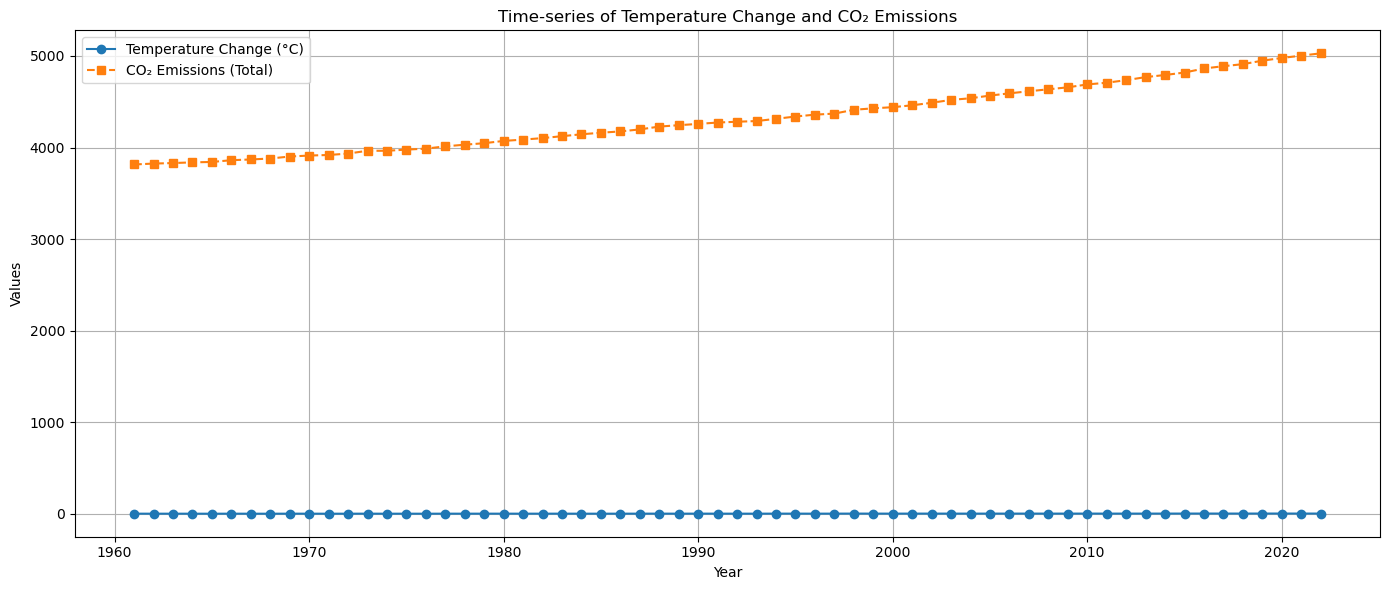

In [51]:
plt.figure(figsize=(14, 6))
plt.plot(combined_df['Year'], combined_df["Temperature Change"], label="Temperature Change (°C)", marker='o')
plt.plot(combined_df['Year'], combined_df["CO2 Emissions"], label="CO₂ Emissions (Total)", linestyle='--', marker='s')
plt.title("Time-series of Temperature Change and CO₂ Emissions")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### This plot visualizws two key environmental metrics over time:

###### 1. CO₂ Emissions (yearly)

###### 2. Global Temperature Anomalies (yearly averages)

##### Key insights drawn from this plot:

###### 1. By plotting both CO₂ emissions and temperature change on the same graph, we obtain a synchronized view of their historical behavior.
###### 2. This pattern suggests a positive correlation: as CO₂ emissions increase, global temperatures tend to increase as well.
###### 3. The Pearson correlation coefficient (~0.955) between CO₂ emissions and temperature change confirms this relationship numerically(This is strong linear relationship)

###### 4. The plot highlights how human activities (fossil fuel burning, deforestation) have accelerated emissions, leading to record-high temperatures in recent decades.

###### 5. The steepest increases in both emissions and temperatures are observed post-1990, aligning with:

###### - Industrial growth in developing countries

###### - Increased global energy demand

###### - Delays in implementing meaningful emission reduction policies

## Correlation Heatmap

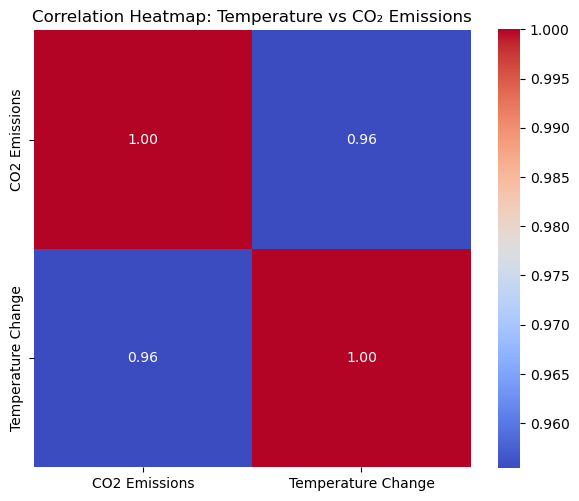

In [52]:
plt.figure(figsize=(6, 5))
sns.heatmap(combined_df[['CO2 Emissions', 'Temperature Change']].corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap: Temperature vs CO₂ Emissions")
plt.tight_layout()
plt.show()

##### This Heatmap shows: 
###### 1. A strong positive correlation observed between : CO₂ Emissions and temperature change
###### 2. This means as CO₂ emissions increase, so does the global temperature.
###### 3. Pearson Correlation Coefficient ≈ 0.955 confirms this strong positive relationship.
###### 4. A value close to +1 indicates a very strong linear relationship.
###### 5. The heatmap backs up the visual trend seen in the time-series plot.
###### 6. No strong negative correlations were found, which means no variable appears to decrease as CO₂ increases.

## Sactter Plot

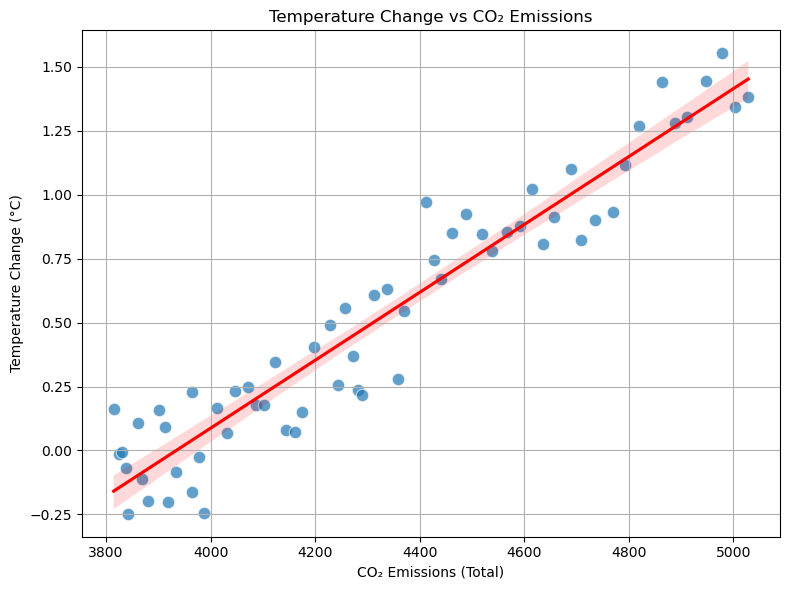

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=combined_df,
    x="CO2 Emissions", y="Temperature Change",
    s=80, alpha=0.7
)
sns.regplot(
    data=combined_df,
    x="CO2 Emissions", y="Temperature Change",
    scatter=False, color='red'
)
plt.title("Temperature Change vs CO₂ Emissions")
plt.xlabel("CO₂ Emissions (Total)")
plt.ylabel("Temperature Change (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Key Insights from this Plot:
###### 1. Each point represents a year,
###### 2. There is a strong upward trend : The pattern is diagonally upward, which tells higher CO₂ emissions correspond to higher temperatures.
###### 3. Linear regression line(in red) : The fitted red line represents the best linear approximation of the relationship.
###### 4. Points are closely clustered around the regression line, indicating low variance around the trend, which suggests a predictable, consistent pattern over time.
###### 5. This plot visually supports the statistical correlation analysis. Both the shape of the scatter and the regression line highlight a strong positive linear association.

###### 6. More emissions → More warming: It visually strengthens the theory that rising anthropogenic emissions are driving the rise in global temperatures.
###### 7. It serves as a baseline visualization before exploring more complex causal and lagged models.

## Trend and Seasonal Analysis

In [54]:
# Processing co2 data
co2_dataset_clean = co2_dataset[co2_dataset['Date'].str.contains(r"^\d{4}M\d{2}$", na=False)].copy()

# Now parse to datetime
co2_dataset_clean['Date'] = pd.to_datetime(co2_dataset_clean['Date'].str.replace("M", "-"), format="%Y-%m")

# Set as index
co2_df = co2_dataset_clean.set_index('Date')

# Resample to month end
co2_monthly = co2_df['Value'].resample('M').mean()

# Process Temperature Data
# Average anomaly per year
global_temp_yearly = temp_melted.groupby('Year')['Temperature_Anomaly'].mean()

# Convert to datetime index for time series usage
global_temp_series = pd.Series(global_temp_yearly.values, 
                               index=pd.to_datetime(global_temp_yearly.index.astype(str), format='%Y'))


### Plotting 

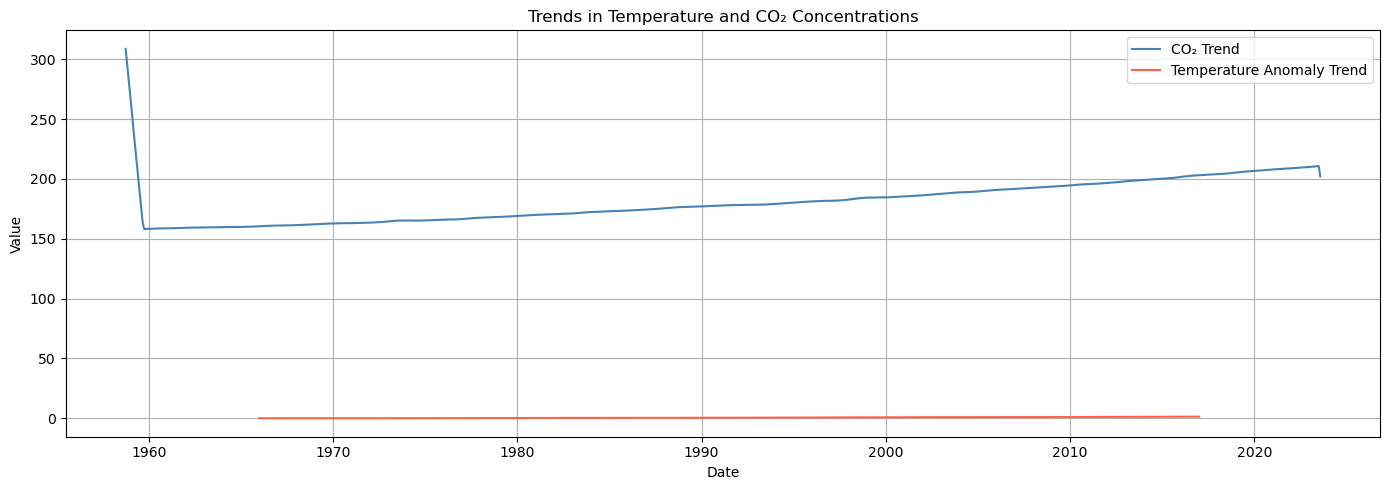

Text(0, 0.5, 'CO$_2$ Concentration (ppm)')

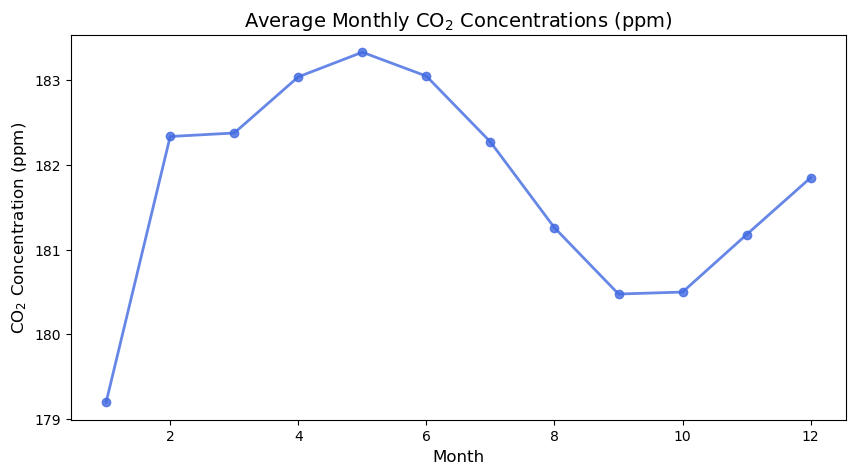

In [55]:
# Seasonal Decomposition 
co2_decomp = seasonal_decompose(co2_monthly.dropna(), model='additive', period=12)
temp_decomp = seasonal_decompose(global_temp_series.dropna(), model='additive', period=10)
# Trends in Temperature and CO2 Concentrations
plt.figure(figsize=(14, 5))
plt.plot(co2_decomp.trend, label='CO₂ Trend', color='steelblue')
plt.plot(temp_decomp.trend, label='Temperature Anomaly Trend', color='tomato')
plt.title('Trends in Temperature and CO₂ Concentrations')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Seasonal Variation in CO2 Concentrations
# Get seasonal component and group by month
monthly_avg_by_month = co2_monthly.groupby(co2_monthly.index.month).mean()

# Plot
plt.figure(figsize=(10, 5))

# Plot the actual monthly average CO₂ concentrations
plt.plot(monthly_avg_by_month.index, monthly_avg_by_month.values, 
         color='royalblue', marker='o', linewidth=2, alpha=0.8)

plt.title('Average Monthly CO$_2$ Concentrations (ppm)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('CO$_2$ Concentration (ppm)', fontsize=12)


##### Trends in Temperature and CO₂ Concentrations:

##### - The graph shows how both CO₂ levels and global temperatures have increased over time.

###### - CO₂ concentrations are rising much faster, with a slope of 0.32.

###### - Temperature anomalies are also increasing, but more slowly, with a slope of 0.03.

###### - This means CO₂ levels are climbing quickly, while temperature changes are steady but gradual.

###### - Even though the temperature rise is slower, it is consistent — showing that the climate is warming over time.

###### - The faster increase in CO₂ may lead to stronger and more noticeable temperature changes in the future
##### Seasonal CO₂ Variations:

###### - The graph shows clear seasonal patterns in CO₂ levels.

###### - CO₂ concentrations peak around May (late spring/early summer).

###### - They drop to the lowest levels around September (early fall).

###### -  This cycle is mainly due to natural processes like:

###### - Photosynthesis during spring and summer, which absorbs CO₂.

###### - Respiration and decay in fall and winter, which release CO₂.

###### - These patterns highlight how plants act as natural carbon sinks, helping to balance atmospheric CO₂ levels.

## Correlation and Causality Analysis

In [56]:
from scipy.stats import pearsonr, spearmanr
from statsmodels.tsa.stattools import grangercausalitytests

# Ensure combined_df is cleaned
combined_df = combined_df.dropna()

# Pearson and Spearman correlations
pearson_corr, _ = pearsonr(combined_df["CO2 Emissions"], combined_df["Temperature Change"])
spearman_corr, _ = spearmanr(combined_df["CO2 Emissions"], combined_df["Temperature Change"])

# First differencing for Granger causality (to achieve stationarity)
granger_data = combined_df[["Temperature Change", "CO2 Emissions"]].diff().dropna()

# Run Granger causality test: CO2 Emissions → Temperature Change
granger_results = grangercausalitytests(granger_data, maxlag=3, verbose=False)

# Extract p-values for each lag
granger_p_values = {
    f"Lag {lag}": round(result[0]['ssr_chi2test'][1], 4)
    for lag, result in granger_results.items()
}

# Print results
print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")
print("Granger Causality p-values (CO₂ Emissions → Temperature Change):")
for lag, p in granger_p_values.items():
    print(f"{lag}: p = {p}")

Pearson Correlation: 0.955
Spearman Correlation: 0.938
Granger Causality p-values (CO₂ Emissions → Temperature Change):
Lag 1: p = 0.0617
Lag 2: p = 0.6754
Lag 3: p = 0.2994


##### To quantify the relationship between CO₂ and temperature anomalies, we will now compute Pearson and Spearman correlation coefficients. And to investigate whether changes in CO₂ cause temperature anomalies, we will performed Granger Causality tests and got following insights : 
##### 1. Strong Correlation:

###### - Pearson correlation = 0.955

###### - Spearman correlation = 0.938
###### ➤ This indicates a strong positive relationship between CO₂ concentrations and temperature anomalies over time.

##### 2. Granger Causality (CO₂ → Temperature):

###### - Lag 1: p = 0.0617 → Near significance, suggests possible short-term predictive power of CO₂ on temperature.

###### - Lag 2 & 3: Higher p-values(0.6754 & 0.2994) → No strong evidence of longer-term predictive causality at these lags.

## Lagged Effect Analysis

In [57]:
# Creating lag features for CO2 emissions
combined_df['CO2 Lag 1'] = combined_df["CO2 Emissions"].shift(1)
combined_df['CO2 Lag 2'] = combined_df["CO2 Emissions"].shift(2)
combined_df['CO2 Lag 3'] = combined_df["CO2 Emissions"].shift(3)

# Drop rows with NaN due to shifting
lagged_data = combined_df.dropna()

# Independent variables: current and lagged CO2
X = lagged_data[['CO2 Emissions', 'CO2 Lag 1', 'CO2 Lag 2', 'CO2 Lag 3']]
y = lagged_data['Temperature Change']

# Add constant (intercept)
X = sm.add_constant(X)

# OLS Regression model
model = sm.OLS(y, X).fit()

# View model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Temperature Change   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     252.5
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           2.97e-34
Time:                        20:52:52   Log-Likelihood:                 45.098
No. Observations:                  59   AIC:                            -80.20
Df Residuals:                      54   BIC:                            -69.81
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.7980      0.317    -15.137

##### To explore delayed effects, we included lagged CO₂ values (1–3 years) in an OLS regression. The results show that current CO₂ levels have a strong and significant impact on temperature changes, while lagged values have little to no significant effect, suggesting the influence is mostly immediate rather than delayed.

##### Model Fit:

###### - R² = 0.949 → The model explains ~95% of the variation in temperature change.

###### - F-statistic p < 0.001 → Model is statistically significant.

##### - CO₂ Effects:

###### Current CO₂ emissions: Significant positive effect on temperature change (coef = 0.0135, p < 0.001).

###### - Lag 1 CO₂: Significant negative effect (coef = -0.0123, p < 0.001), suggesting a delayed balancing influence or multicollinearity.

###### - Lags 2 & 3: Not statistically significant (p > 0.84).

## Clustering of Climate Patterns

In [58]:
# Preparing carbonn emission and temperature data for K-Means Clustering
co2_yearly = co2_monthly.resample('Y').mean()
co2_yearly.index = co2_yearly.index.year  # convert datetime index to year
co2_yearly.name = 'CO2'

temp_yearly = temp_melted.groupby('Year')['Temperature_Anomaly'].mean()
temp_yearly.name = 'Temperature_Anomaly'

# Combine using common index
climate_df = pd.concat([co2_yearly, temp_yearly], axis=1, join='inner')
print(climate_df.head())

             CO2  Temperature_Anomaly
1961  158.938333             0.163053
1962  159.355000            -0.013476
1963  159.580417            -0.006043
1964  159.905833            -0.070059
1965  160.083333            -0.247027


#### Using KMeans Clustering

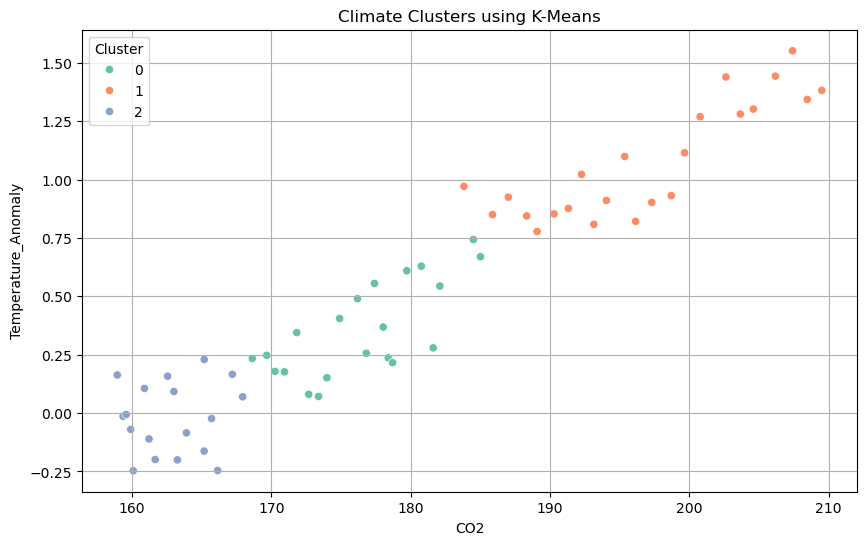

In [59]:
# Scaling
scaler = StandardScaler()
climate_scaled = scaler.fit_transform(climate_df)

# Fitting KMeans Model
kmeans = KMeans(n_clusters=3, random_state=42)
climate_df['Cluster'] = kmeans.fit_predict(climate_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=climate_df, x='CO2', y='Temperature_Anomaly', hue='Cluster', palette='Set2')
plt.title("Climate Clusters using K-Means")
plt.grid(True)
plt.show()


##### The clustering graph divides the years into three clear climate categories based on CO₂ concentration and temperature change:

###### - Blue cluster: Lower CO₂ levels and minimal temperature changes (earlier years).

###### - Green cluster: Moderate CO₂ and moderate warming (transitional phase).

###### - Orange cluster: High CO₂ levels and significant temperature rise (recent years).

##### This progression from green to orange to blue highlights a strong upward trend—both in CO₂ and temperature. It visually reinforces the close link between greenhouse gas buildup and rising global temperatures.

##### Overall, the clusters reflect the growing impact of carbon emissions over time and stress the importance of taking meaningful action to limit future climate change.

## What-If Analysis to see effects of change in carbon emission on temmperature


What-if Analysis: CO2 changed by ±10%

Base CO2: 380.0 ppm → Temp: 6.880°C
  ↑ +10% → CO2: 418.0 ppm → Temp: 8.090°C
  ↓ -10% → CO2: 342.0 ppm → Temp: 5.670°C

Base CO2: 400.0 ppm → Temp: 7.517°C
  ↑ +10% → CO2: 440.0 ppm → Temp: 8.791°C
  ↓ -10% → CO2: 360.0 ppm → Temp: 6.244°C

Base CO2: 420.0 ppm → Temp: 8.154°C
  ↑ +10% → CO2: 462.0 ppm → Temp: 9.491°C
  ↓ -10% → CO2: 378.0 ppm → Temp: 6.817°C

Base CO2: 440.0 ppm → Temp: 8.791°C
  ↑ +10% → CO2: 484.0 ppm → Temp: 10.192°C
  ↓ -10% → CO2: 396.0 ppm → Temp: 7.390°C

Base CO2: 460.0 ppm → Temp: 9.428°C
  ↑ +10% → CO2: 506.0 ppm → Temp: 10.893°C
  ↓ -10% → CO2: 414.0 ppm → Temp: 7.963°C

Base CO2: 480.0 ppm → Temp: 10.065°C
  ↑ +10% → CO2: 528.0 ppm → Temp: 11.593°C
  ↓ -10% → CO2: 432.0 ppm → Temp: 8.536°C

Base CO2: 500.0 ppm → Temp: 10.702°C
  ↑ +10% → CO2: 550.0 ppm → Temp: 12.294°C
  ↓ -10% → CO2: 450.0 ppm → Temp: 9.109°C



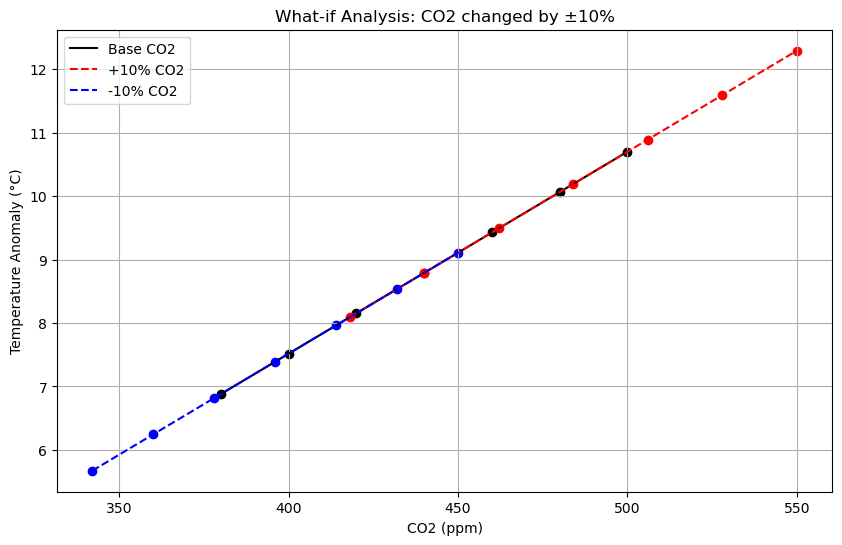

In [60]:
# Defining features and targets
X = climate_df[['CO2']].values
y = climate_df['Temperature_Anomaly'].values

model = LinearRegression()
model.fit(X, y)

# Base CO2 levels to compare with 
base_co2 = np.array([380, 400, 420, 440, 460, 480, 500])

# Simulate CO2 increase/decrease by percentage 
percent_change = 10  # Change this to simulate different percentages
increased_co2 = base_co2 * (1 + percent_change / 100)
decreased_co2 = base_co2 * (1 - percent_change / 100)

# Predictions
pred_base = model.predict(base_co2.reshape(-1, 1))
pred_increase = model.predict(increased_co2.reshape(-1, 1))
pred_decrease = model.predict(decreased_co2.reshape(-1, 1))

# Display results 
print(f"\nWhat-if Analysis: CO2 changed by ±{percent_change}%\n")
for i in range(len(base_co2)):
    print(f"Base CO2: {base_co2[i]:.1f} ppm → Temp: {pred_base[i]:.3f}°C")
    print(f"  ↑ +{percent_change}% → CO2: {increased_co2[i]:.1f} ppm → Temp: {pred_increase[i]:.3f}°C")
    print(f"  ↓ -{percent_change}% → CO2: {decreased_co2[i]:.1f} ppm → Temp: {pred_decrease[i]:.3f}°C\n")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(base_co2, pred_base, label='Base CO2', color='black')
plt.plot(increased_co2, pred_increase, 'r--', label=f'+{percent_change}% CO2')
plt.plot(decreased_co2, pred_decrease, 'b--', label=f'-{percent_change}% CO2')

plt.scatter(base_co2, pred_base, color='black')
plt.scatter(increased_co2, pred_increase, color='red')
plt.scatter(decreased_co2, pred_decrease, color='blue')

plt.xlabel("CO2 (ppm)")
plt.ylabel("Temperature Anomaly (°C)")
plt.title(f"What-if Analysis: CO2 changed by ±{percent_change}%")
plt.legend()
plt.grid(True)
plt.show()


##### This analysis models how temperature anomalies would respond to a ±10% change in CO₂ concentrations, based on a simple linear regression.

##### Temperature responds proportionally to CO₂ changes: As CO₂ levels increase or decrease by 10%, temperature anomalies follow a consistent upward or downward shift. For instance, at a base level of 400 ppm, a 10% increase (to 440 ppm) results in a predicted anomaly of 8.79°C, while a 10% decrease (to 360 ppm) drops it to 6.24°C.

##### Impact becomes more significant at higher concentrations: The effect of a 10% change in CO₂ becomes more pronounced at higher base levels. For example, at 500 ppm, a 10% increase adds about 1.6°C, compared to a ~1.2°C rise at 400 ppm.

##### Linear relationship assumption: The predictions are based on a linear model, which simplifies real-world climate dynamics but helps illustrate the direct proportionality between CO₂ and temperature under controlled conditions.

## Conclusion

##### This analysis demonstrates a clear and compelling relationship between rising atmospheric CO₂ concentrations and global temperature anomalies. Through statistical modeling, time-series decomposition, and clustering, we observe consistent upward trends in both CO₂ emissions and global temperatures over recent decades. Seasonal analysis further reveals the natural cyclical behavior of CO₂ levels, likely influenced by biospheric activity and carbon sinks.

##### The study also highlights that CO₂ concentrations are increasing at a faster pace than temperatures, and that current CO₂ levels have a stronger  influence on present-day temperature anomalies than historical emissions. What-if scenario simulations indicate that even small percentage changes in CO₂ levels can lead to measurable shifts in global temperatures, underlining the sensitivity of Earth's climate system to carbon emissions.

##### These findings emphasize the urgent need for emission control strategies and climate policy interventions. By understanding the dynamics of CO₂ and temperature interdependence, we gain valuable insights into how proactive measures today can meaningfully shape our environmental future.